<a href="https://colab.research.google.com/github/Diegobr72/Alura/blob/master/Regress%C3%A3o%20logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('/home/WineQT - Copiar.csv').dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [2]:
x = df.drop('quality', axis=1)
y = df['quality']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

sc = StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)



In [3]:
# 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
# 'max_iter': [50, 100, 150],
# 'activation': ['tanh', 'relu'],
# 'solver': ['sgd', 'adam'],
# 'alpha': [0.0001, 0.05],
# 'learning_rate': ['constant','adaptive'],

clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 6000,
                        activation = 'tanh',
                        alpha = 0.05,
                        solver = 'adam')
clf.fit(trainX_scaled, trainY)


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              max_iter=6000)

In [4]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.61


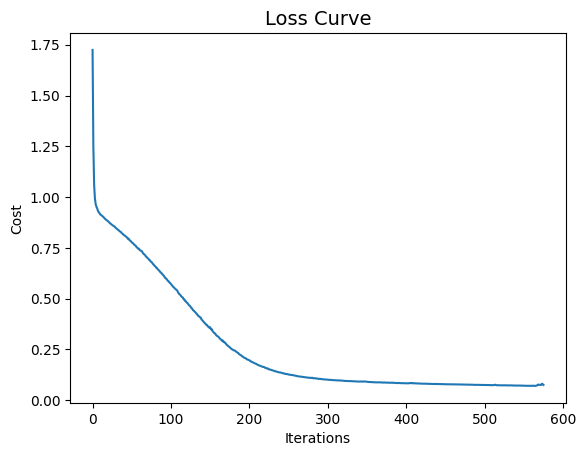

In [5]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()